In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


this the dataset having 614 rows and 13 columns. data includes both object and numerical data. loan status is target variable.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we have toatal 8 features having object data.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

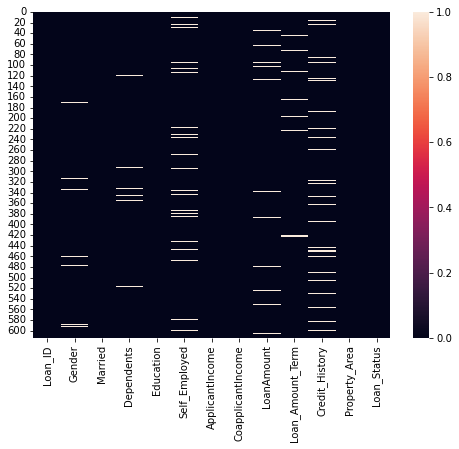

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

here we can see our dataset have null values. according  to categorical and continous data we will have to replace the null values.

In [8]:
df = df.drop_duplicates()
df.shape

(614, 13)

In [9]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

Here is the description for all column from I can see the value counts for each variable.this data shows the info for which 
columns have continuous data and which have categorical data.

# DATA VISIUVALIZATION:

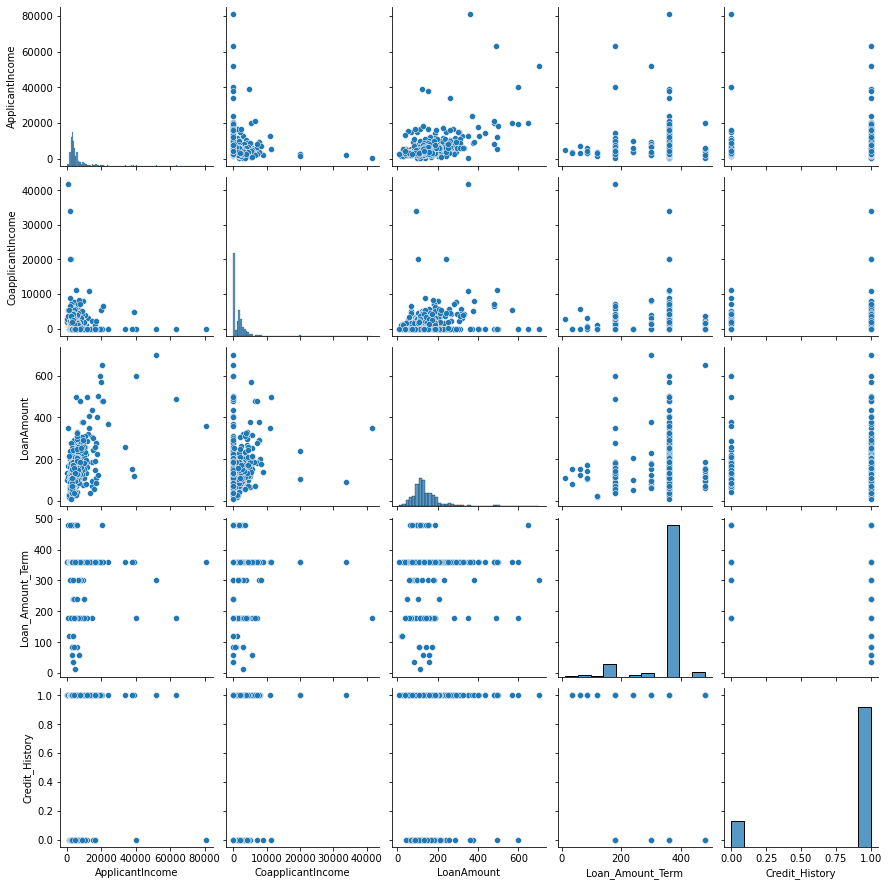

In [10]:
sns.pairplot(df)
plt.show()


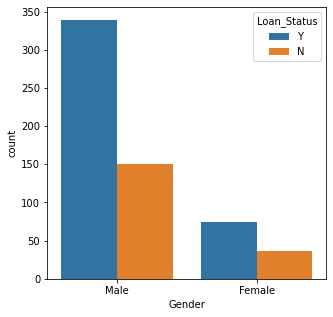

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

no.of male customers are higher than female customers and loan approval status for male customer is also higher than female.


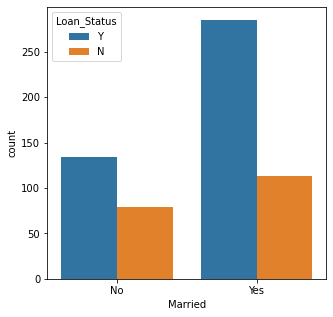

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(df['Married'], hue=df['Loan_Status'])
plt.show()

customers which are marrierd are taking more loans than unmarried.

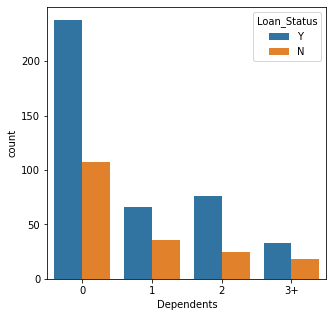

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.show()

dependts are the number of people dependent on the applicant who has taken loan has been provided

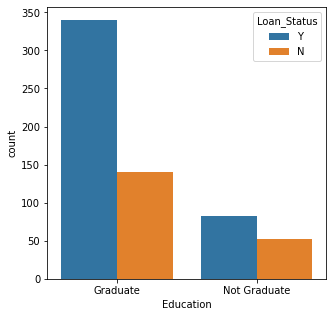

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

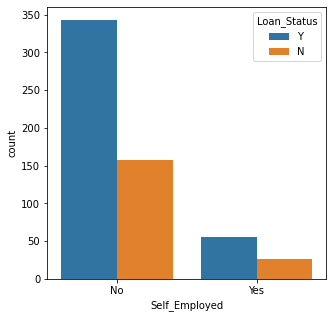

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

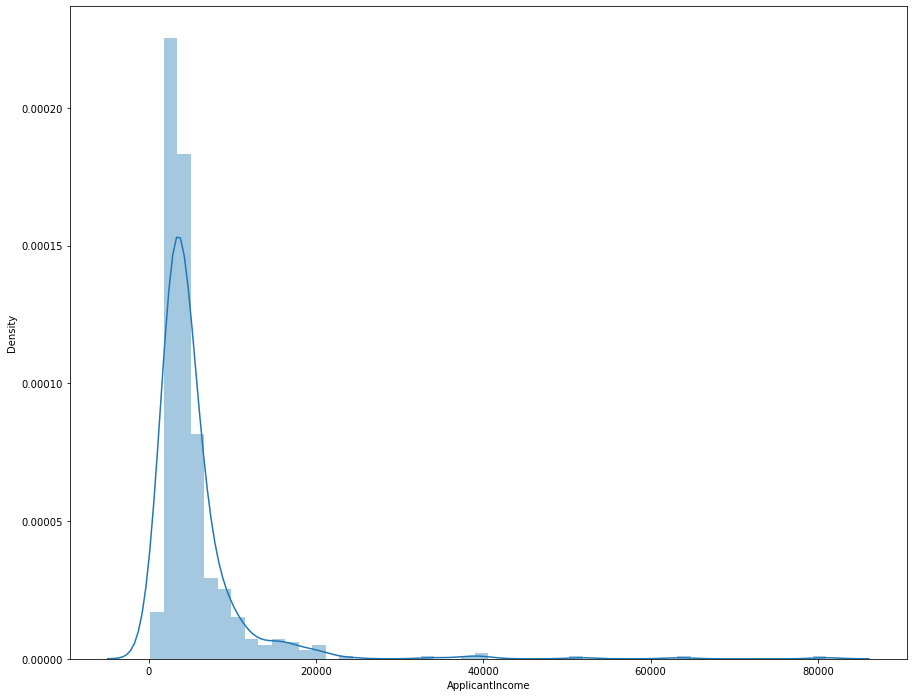

In [16]:
plt.figure(figsize=(15,12))
sns.distplot(df['ApplicantIncome'])
plt.show()

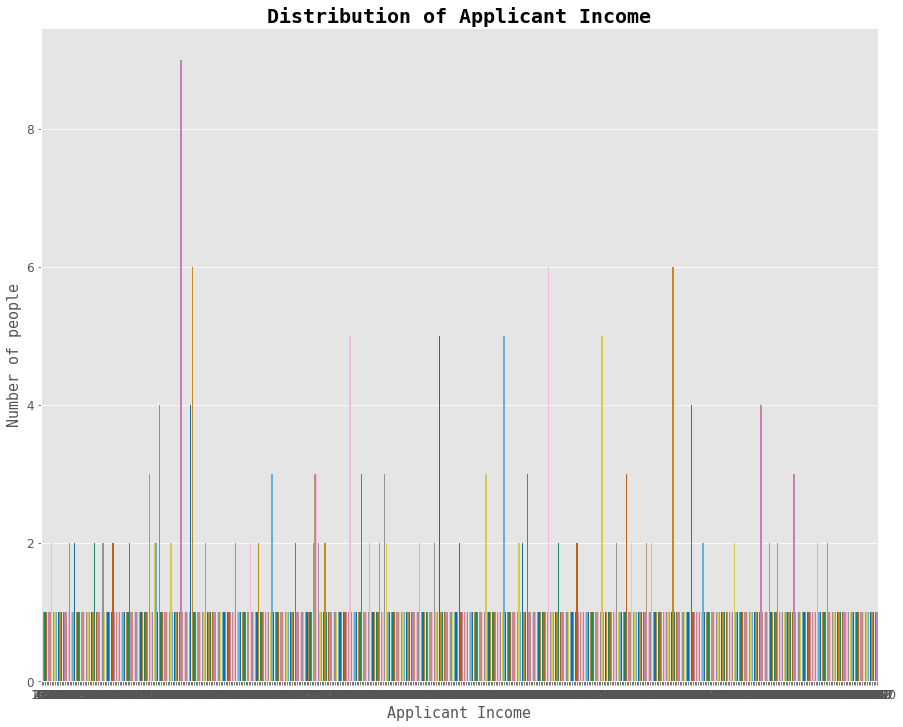

In [17]:
income_num = df['ApplicantIncome'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
sns.barplot(income_num.index, income_num.values, palette='colorblind')
plt.title('Distribution of Applicant Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Applicant Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

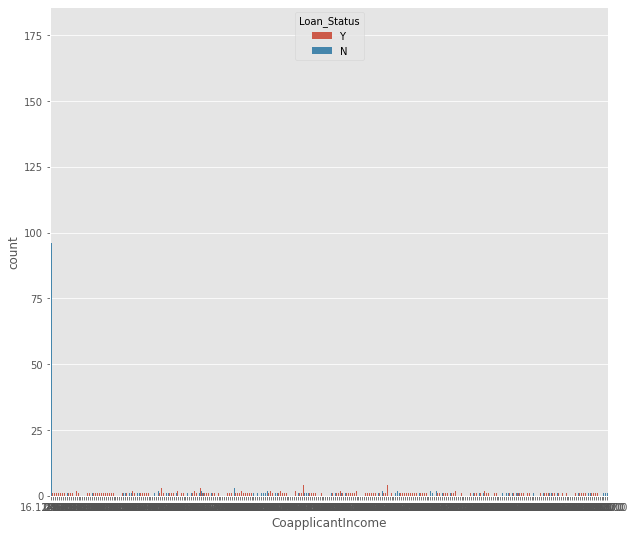

In [18]:
plt.figure(figsize=(10,9))
sns.countplot(df['CoapplicantIncome'], hue=df['Loan_Status'])
plt.show()

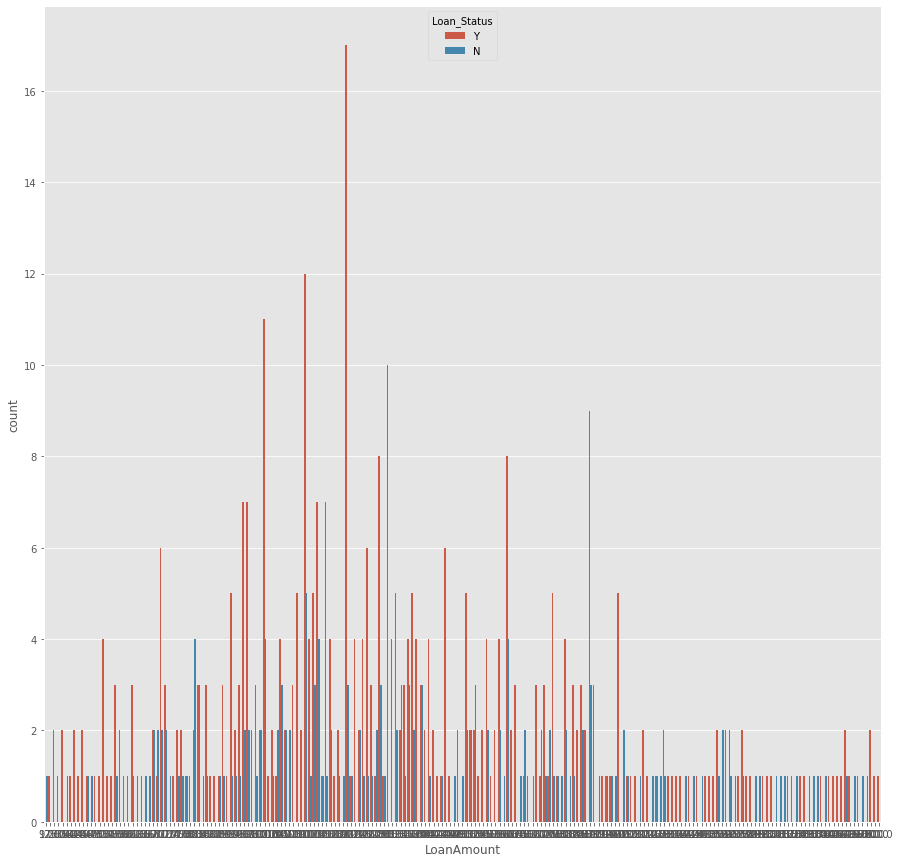

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(df['LoanAmount'], hue=df['Loan_Status'])
plt.show()

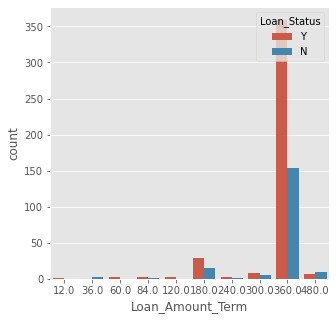

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(df['Loan_Amount_Term'], hue=df['Loan_Status'])
plt.show()

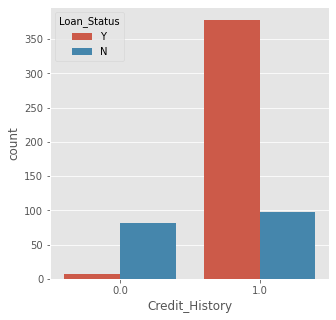

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(df['Credit_History'], hue=df['Loan_Status'])
plt.show()

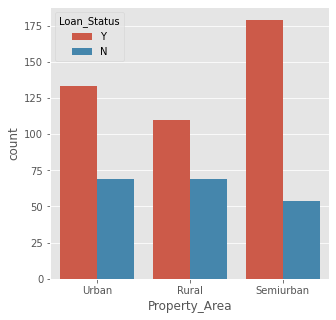

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

In [23]:
df = df.drop(['Loan_ID'],axis=1)

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


loan id is not important feature while predicating the status.I dropped the ID column.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


here i have converted object data into numerical using labelencoder.

In [28]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )

In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

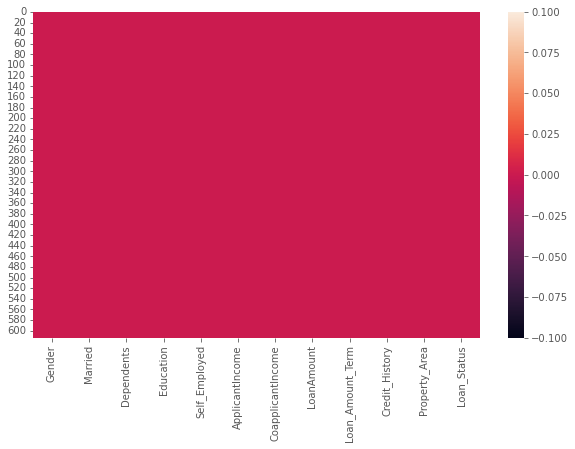

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

here data filled with meaningful data using mean and mode. now our dataset does not have any null value.

# skewness:

In [31]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness is present in applicant income,copplicant income. So here I am using Log method to the specified columns to remove the skewness.

In [32]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])


In [33]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [34]:
df.shape

(614, 12)

# Outliers:

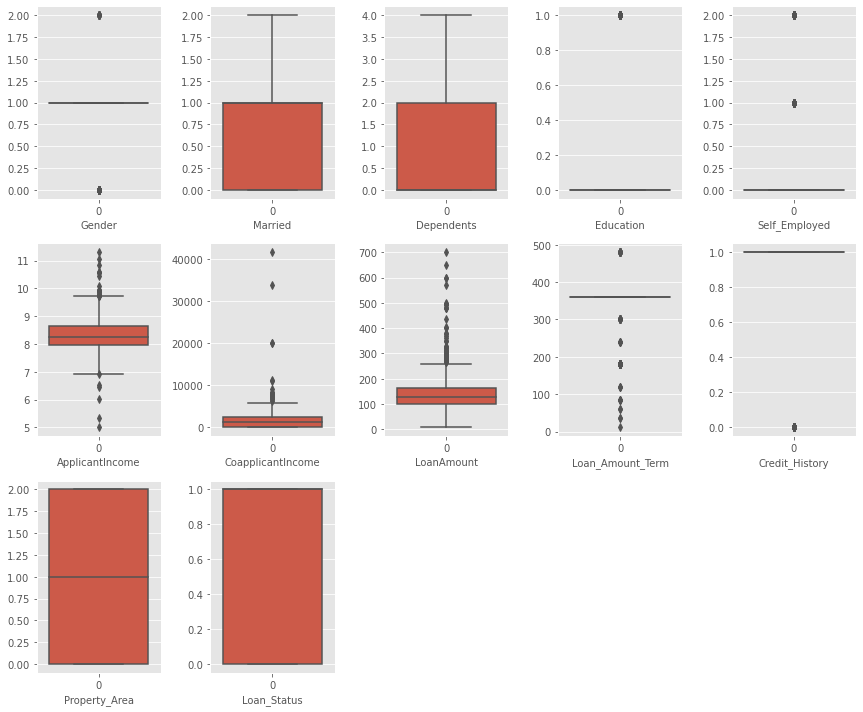

In [35]:
plt.figure(figsize =(12,10),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

In [36]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [37]:
co_income_high = (q3.CoapplicantIncome + (1.5 *iqr.CoapplicantIncome))
co_income_high

outliers2 = np.where(df['CoapplicantIncome'] > co_income_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(596, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,609,0,0,0,0,0,7.972466,0.0,71.000000,360.0,1.0,0,1
592,610,1,1,3,0,0,8.320205,0.0,40.000000,180.0,1.0,0,1
593,611,1,1,1,0,0,8.996157,240.0,253.000000,360.0,1.0,2,1
594,612,1,1,2,0,0,8.933664,0.0,187.000000,360.0,1.0,2,1


here I have removed all outliers for copplicatn column only as for applicant column I alredy used log transfomration to remove skewness.

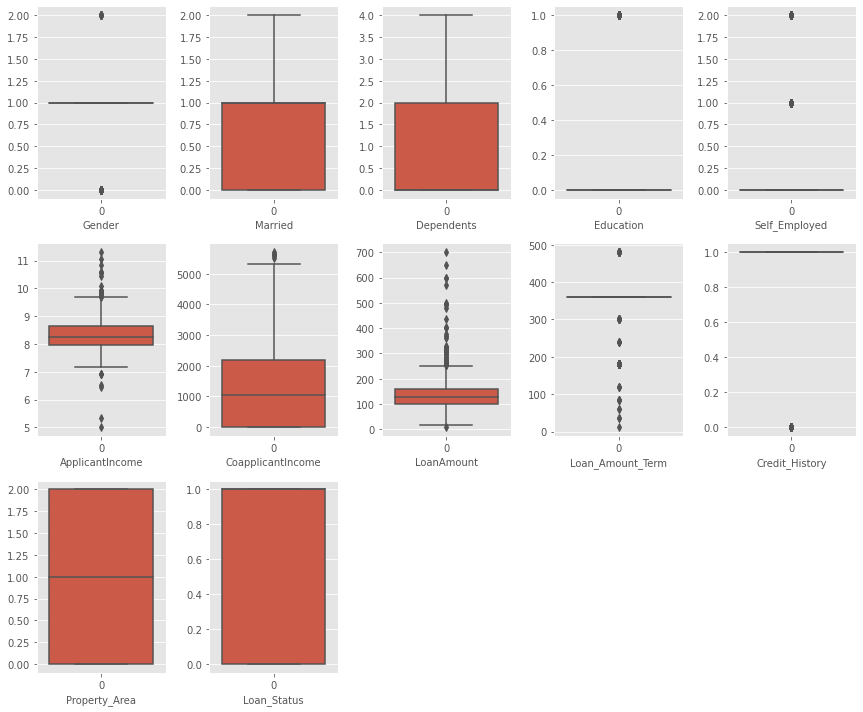

In [38]:
plt.figure(figsize =(12,10),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

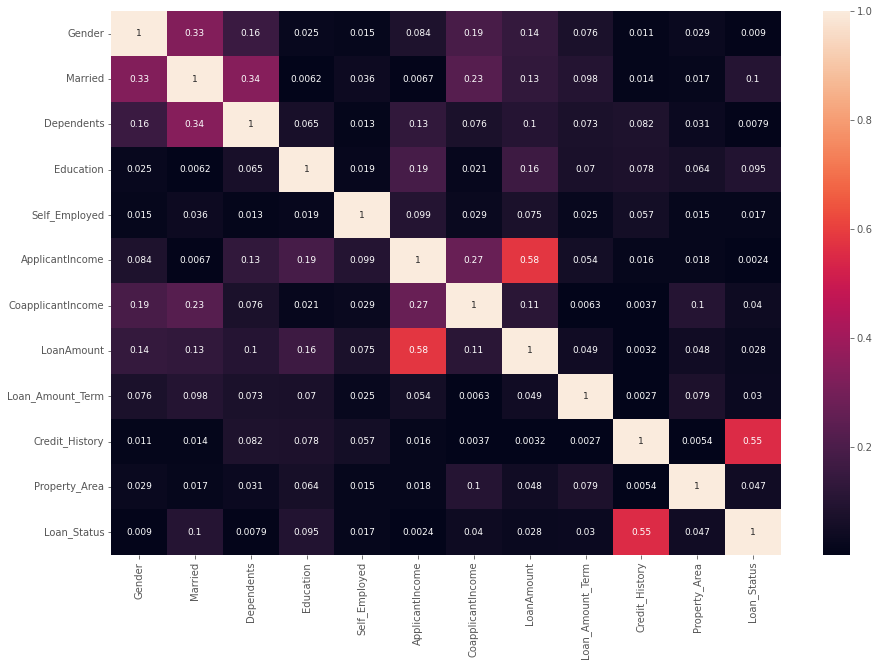

In [39]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

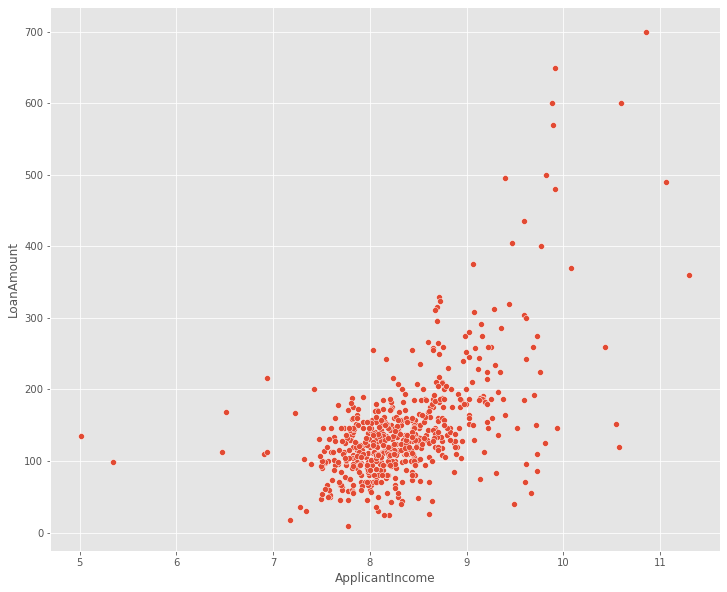

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount',data=df)
plt.show()

from above correlation heatmap and scattterplot its showing none of feature is not hightly corealted with eachother. so data
does not have the problem of multicolienarity.

In [41]:
X = df.drop(['Loan_Status'],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,8.430109,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,8.006368,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,7.856707,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,8.699515,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,8.320205,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8.996157,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,8.933664,0.0,187.000000,360.0,1.0,2


In [42]:
y = df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 596, dtype: int32

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

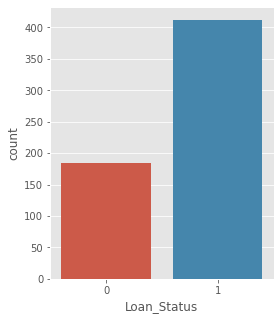

In [43]:
plt.figure(figsize=(4,5))
sns.countplot(df['Loan_Status'])

target variable data is imbalanced.

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
SMOTE()

SMOTE()

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [48]:
from collections import Counter
ove_smp = SMOTE(0.85)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({1: 309, 0: 138})
the number of the classes after fit Counter({1: 309, 0: 262})


# TRAINING AND TESTING

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.825 random_state 0
accuracy 0.825 random_state 0
accuracy 0.8083333333333333 random_state 1
accuracy 0.8083333333333333 random_state 2
accuracy 0.8 random_state 3
accuracy 0.825 random_state 4
accuracy 0.9166666666666666 random_state 5
accuracy 0.9166666666666666 random_state 5
accuracy 0.8083333333333333 random_state 6
accuracy 0.8333333333333334 random_state 7
accuracy 0.7833333333333333 random_state 8
accuracy 0.8333333333333334 random_state 9
accuracy 0.85 random_state 10
accuracy 0.8 random_state 11
accuracy 0.8083333333333333 random_state 12
accuracy 0.8333333333333334 random_state 13
accuracy 0.8833333333333333 random_state 14
accuracy 0.775 random_state 15
accuracy 0.8166666666666667 random_state 16
accuracy 0.8416666666666667 random_state 17
accuracy 0.8083333333333333 random_state 18
accuracy 0.8166666666666667 random_state 19
accuracy 0.8 random_state 20
accuracy 0.8083333333333333 random_state 21
accuracy 0.7916666666666666 random_state 22
accuracy 0.758333333333

In [51]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.9166666666666666 Random State 5


In [52]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state =5,test_size = 0.20)


In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred_test = lr.predict(x_test)

In [55]:
print(accuracy_score(y_test,pred_test))

0.9166666666666666


In [56]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        35
           1       0.89      1.00      0.94        85

    accuracy                           0.92       120
   macro avg       0.95      0.86      0.89       120
weighted avg       0.93      0.92      0.91       120



In [57]:
print(confusion_matrix(y_test,pred_test))

[[25 10]
 [ 0 85]]


In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.7583333333333333
[[27  8]
 [21 64]]
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        35
           1       0.89      0.75      0.82        85

    accuracy                           0.76       120
   macro avg       0.73      0.76      0.73       120
weighted avg       0.79      0.76      0.77       120



In [59]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8916666666666667
[[27  8]
 [ 5 80]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.91      0.94      0.92        85

    accuracy                           0.89       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.89      0.89      0.89       120



In [60]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.9166666666666666
[[25 10]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        35
           1       0.89      1.00      0.94        85

    accuracy                           0.92       120
   macro avg       0.95      0.86      0.89       120
weighted avg       0.93      0.92      0.91       120



In [61]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8666666666666667
[[26  9]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.90      0.92      0.91        85

    accuracy                           0.87       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.86      0.87      0.87       120



In [62]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8166666666666667
[[26  9]
 [13 72]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        35
           1       0.89      0.85      0.87        85

    accuracy                           0.82       120
   macro avg       0.78      0.79      0.79       120
weighted avg       0.82      0.82      0.82       120



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.8916666666666667
[[27  8]
 [ 5 80]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.91      0.94      0.92        85

    accuracy                           0.89       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.89      0.89      0.89       120



In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = xgb.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.85
[[29  6]
 [12 73]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        35
           1       0.92      0.86      0.89        85

    accuracy                           0.85       120
   macro avg       0.82      0.84      0.83       120
weighted avg       0.86      0.85      0.85       120



from all the above model's observations I can see that Logistic Regression and SVC are giving high accuracy which is 89%. and both are giving same confusion matrix report true negetive rate is 0 for both models. now i will check the cross validation score for this two models.

# CROSS VALIDATION

In [65]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=4)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.8070469798657718


In [66]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_scaled,y,cv=2)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.8171140939597316


In [67]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,X_scaled,y,cv=10)
print("Cross Validation Score for Kneibours Classifier Model is:-",scr.mean())

Cross Validation Score for Kneibours Classifier Model is:- 0.792090395480226


In [68]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bt,X_scaled,y,cv=6)
print("Cross Validation Score for BaggingClassifier Model is:-",scr.mean())

Cross Validation Score for BaggingClassifier Model is:- 0.7734848484848484


In [76]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X_scaled,y,cv=10)
print("Cross Validation Score for Adaboost Classifier Model is:-",scr.mean())

Cross Validation Score for Adaboost Classifier Model is:- 0.7937853107344633


# HyperPatameter Tuning

for Logistic Regression:-

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.01,0.1,0.002,0.2],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

In [78]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [79]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [80]:
GCV.best_estimator_

LogisticRegression(C=0.001, solver='liblinear')

In [81]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9166666666666666

<function matplotlib.pyplot.show(close=None, block=None)>

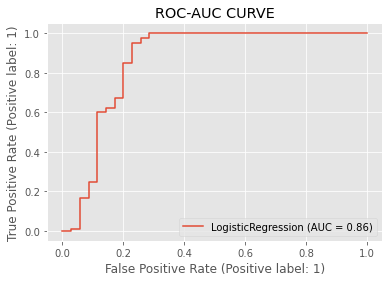

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

# for SVC

In [83]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.001,0.01,0.1,0.002,0.2],'max_iter':[-1,2,3,4,5],'decision_function_shape':['ovr','ovo'],'gamma':['scale','auto']}


In [84]:
GCV2 = GridSearchCV(SVC(),parameters,cv=5,scoring='accuracy')
GCV2.fit(x_train,y_train)
GCV2.best_params_

{'C': 0.2, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'max_iter': -1}

In [85]:
type(GCV2)

sklearn.model_selection._search.GridSearchCV

In [86]:
GCV2.best_estimator_

SVC(C=0.2)

In [87]:
GCV2_pred = GCV2.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV2_pred)

0.8833333333333333

<function matplotlib.pyplot.show(close=None, block=None)>

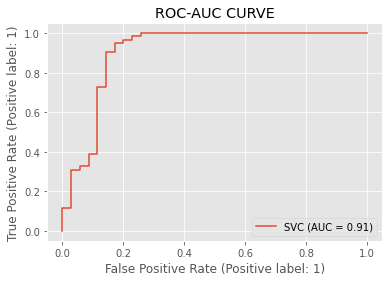

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV2.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

# FOR KNN 

In [89]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[4,5,6,7,8,9],'weights':['uniform','distinct'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,20,30]}
              

In [90]:
GCV3 = GridSearchCV(knn,parameters,cv=3,scoring='accuracy')
GCV3.fit(x_train,y_train)
GCV3.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'uniform'}

In [91]:
type(GCV3)

sklearn.model_selection._search.GridSearchCV

In [92]:
GCV3.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=9)

In [93]:
GCV3_pred = GCV3.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV3_pred)

0.925

<function matplotlib.pyplot.show(close=None, block=None)>

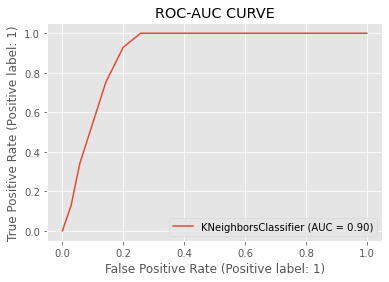

In [94]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV3.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

from above ruc_auc curves and hyperparamet tuning. SVC would be best fit model for this problem statment as for SVC difference between cross validation score and score applied after hyperparameter tuning is less than other models. 90% after applying hyperparameter tuning. 


In [96]:
import joblib
joblib.dump(GCV2.best_estimator_,'loan application status model.pkl')

['loan application status model.pkl']